# Создание фрейма, первичная аналитика данных

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Чтение df

In [ ]:
df = pd.read_csv('../data/raw/lenta-ru-news.csv', encoding='utf-8')

## Сохранение df в виде архива gzip

In [11]:
df.to_csv('../data/raw/lenta.csv.gz', index=False, compression='gzip')

## Чтение df, вывод первых 5 строк

In [ ]:
df = pd.read_csv('../data/raw/lenta.csv.gz')

In [14]:
df.head()

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18


## Очистка данных

### 1. Удаление дбликатов:

In [15]:
df.drop_duplicates(inplace=True)

### 2. Обработка пропущенных значений:

In [16]:
df.dropna(inplace=True)

### 3. Приведение столбца даты в нужный формат:

In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
df.head()

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914-09-16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914-09-16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914-09-17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914-09-17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914-09-18


## Исследовательский анализ датасета (EDA) по признакам

### 1. Создание графика распределения статей по годам

C:\Users\Rreeo\AppData\Local\Temp\ipykernel_4984\1260787595.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='viridis')


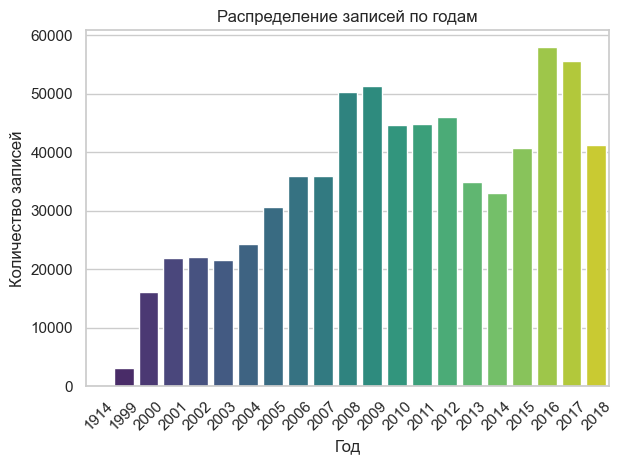

In [19]:
# Добавляем колонку с годом
df['year'] = df['date'].dt.year

# Выводим значение x из датафрейма
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x='year', palette='viridis')

# Настраиваем подписи для таблиц
plt.xlabel('Год')
plt.ylabel('Количество записей')
plt.title('Распределение записей по годам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Выводим распределение по категориям во всем датафрейме

<Axes: xlabel='topic'>

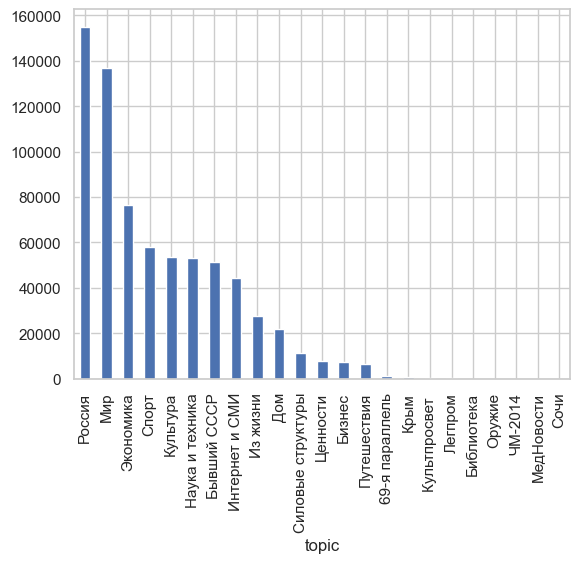

In [20]:
df['topic'].value_counts().plot(kind='bar')

### 3. Проведение анализа длинны статей в столбце text

<Axes: >

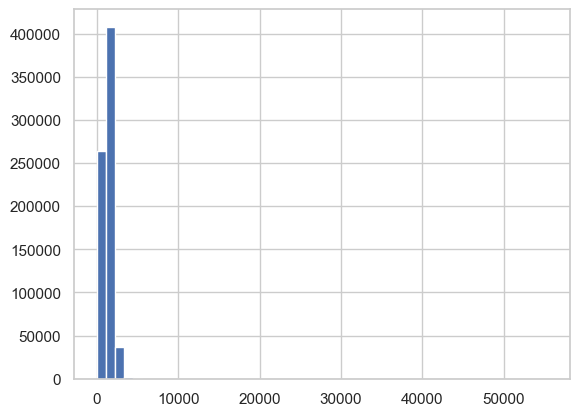

In [21]:
df['text_length'] = df['text'].apply(len)
df['text_length'].hist(bins=50)

### 4. Проведение частотного анализа слов на примере 10 000 строк данных

In [ ]:
from collections import Counter

counter = Counter()

chunksize = 10000
for chunk in pd.read_csv('../data/raw/lenta-ru-news.csv', chunksize=chunksize):
    chunk['text'] = chunk['text'].fillna('') # приведение столбца text к строкому типу с пустой строкой
    for text in chunk['text']:
        words = text.lower().split()
        counter.update(words)

# Топ-20 слов
print(counter.most_common(20))


[('в', 6994806), ('и', 2935347), ('на', 2837325), ('что', 1638965), ('по', 1610370), ('с', 1463420), ('не', 1103141), ('из', 730449), ('о', 618628), ('как', 612709), ('за', 584441), ('—', 581790), ('к', 550614), ('-', 519213), ('его', 498085), ('этом', 482667), ('а', 480448), ('для', 473848), ('об', 456694), ('от', 441187)]


### 5. Создание таблицы с годом статьи

In [22]:
df['date'] = pd.to_datetime(df['date']) # находим столбец с датой
df['year'] = df['date'].dt.year # создаем столбец с годом

In [23]:
df.head()

,url,title,text,topic,tags,date,year,text_length
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914-09-16,1914,901
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914-09-16,1914,346
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914-09-17,1914,1923
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914-09-17,1914,703
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914-09-18,1914,754


#### 5.1 Проверка типов столбцов после изменения

In [24]:
print(df['date'].dtype)
print(df['year'].dtype)

datetime64[ns]
int32


#### 5.2 Сохранение обработанного df

In [31]:
df.to_parquet('../data/processed/processed_lenta.parquet', compression='gzip', engine='pyarrow')

# Создание df с "испорченными" данными для обучения модели

In [ ]:
df = pd.read_parquet('../data/processed/processed_lenta.parquet')

In [ ]:
df.head()